## Synthetic kNN
This Notebook applies the k nearest neighbor to the synthetic data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from scipy.io import loadmat
from sklearn.neighbors import NearestNeighbors
import h5py
from scipy.io.arff import loadarff 
from utils.utils_knn import *
from sklearn.datasets import load_breast_cancer
import pickle

sns.set_style('darkgrid')

SEED = 42

np.random.seed(SEED)
sns.set()

### Load Data

In [2]:
df = pd.read_csv("data/synthetic_data_6d.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 6 columns):
f0    2000 non-null float64
f1    2000 non-null float64
f2    2000 non-null float64
f3    2000 non-null float64
f4    2000 non-null float64
f5    2000 non-null float64
dtypes: float64(6)
memory usage: 109.4 KB


In [3]:
X = df.values

X_scaled = scale_data(X)

X.shape

(2000, 6)

In [4]:
N_NEIGHBORS = 10
ALGORITHM = "brute"

scores, neigh = fit_predict_knn(X_scaled, N_NEIGHBORS, ALGORITHM)

scored_df = pd.DataFrame(X)
scored_df.columns = df.columns
scored_df.index = df.index
scored_df["score"] = scores

sorted_df = scored_df.sort_values(by="score", ascending=False)
sorted_df.head(5)

,f0,f1,f2,f3,f4,f5,score
1001,3.00000,11.000000,13.647764,13.292576,12.101727,13.604768,0.381091
0,5.00000,5.000000,-1.264096,-2.222573,-1.009932,-1.759441,0.354455
1002,12.00000,6.000000,12.878718,11.445100,13.675763,11.066313,0.220302
1,3.00000,-1.054384,-0.972645,-0.991855,-0.881214,-1.067916,0.158102
1294,11.63343,15.157460,12.964324,11.588559,14.720199,12.633918,0.132220


In [5]:
#save neighbors
with open('results/neighbors_synthetic.pkl', 'wb') as f:
    pickle.dump(neigh, f)

### Calculate distances per dimension

In [6]:
dist = dist_per_dimension(X_scaled, neigh, sorted_df.index.values)
distances = pd.DataFrame(dist, columns=df.columns)
distances.index = sorted_df.index
distances.head(2).sum()
distances.head(5)

,f0,f1,f2,f3,f4,f5
1001,0.371815,0.032679,0.096902,0.063416,0.019881,0.105501
0,0.217656,0.242812,0.080429,0.128324,0.074188,0.103048
1002,0.019596,0.198834,0.033031,0.003753,0.093025,0.009625
1,0.145623,0.041347,0.028732,0.034930,0.036966,0.044114
1294,0.042181,0.083778,0.002917,0.041403,0.041359,0.000248


### Store Results

In [15]:
sorted_df.to_csv("results/knn_synthetic_scored.csv")
distances.to_csv("results/knn_synthetic_distances.csv")

### Examine Results

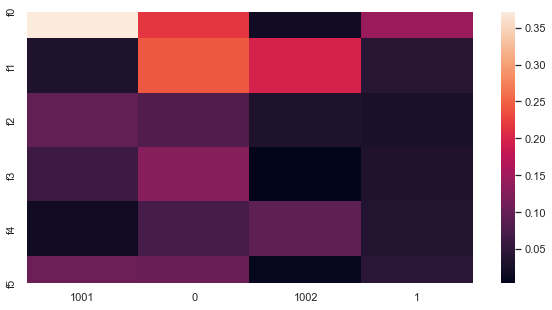

In [12]:
plt.figure(figsize=[10, 5])
sns.heatmap(distances.head(4).T)

<BarContainer object of 6 artists>

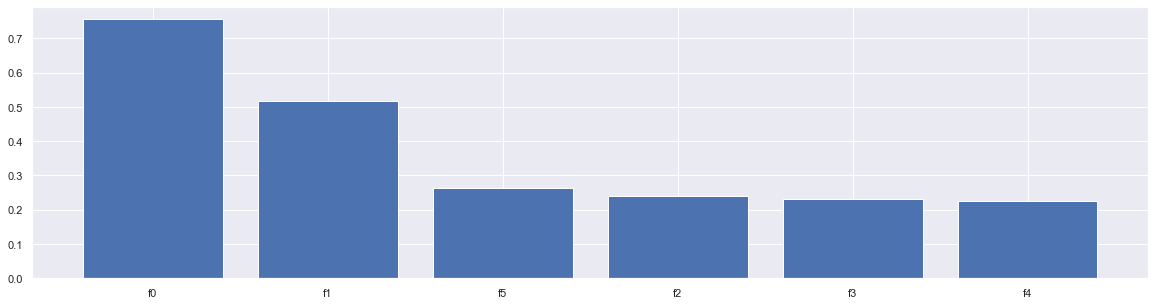

In [13]:
# sum up the feature ranking for the 4 outliers over all 6 dimensions
TOP_COLUMNS = 10
plt.figure(figsize=[20, 5])
dist_sum = distances.head(4).sum().sort_values(ascending=False)[:TOP_COLUMNS]
plt.bar(dist_sum.index, dist_sum.values)